In [3]:
import numpy as np
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt


In [ ]:
time_dir = "/Users/chenhaozhe/Desktop/FIG/computation_time"

fourier = np.load(f"{time_dir}/fourier_times.npy")   
rbf = np.load(f"{time_dir}/rbf_times.npy")          

f = fourier.ravel()
r = rbf.ravel()

def summary(x):
    return {
        "n": x.size,
        "mean": float(np.mean(x)),
        "std": float(np.std(x, ddof=1)),
        "median": float(np.median(x)),
        "q25": float(np.quantile(x, 0.25)),
        "q75": float(np.quantile(x, 0.75)),
        "min": float(np.min(x)),
        "max": float(np.max(x)),
    }

print("Fourier summary:", summary(f))
print("RBF summary:", summary(r))

# Nonparametric distribution comparison
u = mannwhitneyu(f, r, alternative="two-sided")
print("Mann–Whitney U:", u.statistic, "p =", u.pvalue)

Fourier summary: {'n': 20, 'mean': 14.950441054336261, 'std': 3.8342360956208776, 'median': 14.739887625095434, 'q25': 11.58387340605259, 'q75': 19.043676895671524, 'min': 9.637922500027344, 'max': 20.776615124894306}
RBF summary: {'n': 20, 'mean': 5.897025050083175, 'std': 1.7179744437405606, 'median': 5.507838333491236, 'q25': 4.5445058337645605, 'q75': 6.617710927850567, 'min': 4.230507208034396, 'max': 9.08582929102704}
Mann–Whitney U: 400.0 p = 6.795615128173358e-08


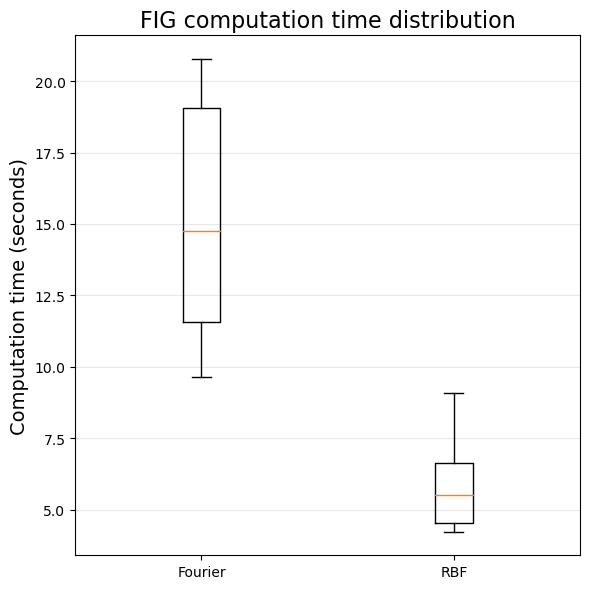

In [4]:


fourier = np.load(f"{time_dir}/fourier_times.npy").ravel()
rbf = np.load(f"{time_dir}/rbf_times.npy").ravel()

plt.figure(figsize=(6, 6))

plt.boxplot(
    [fourier, rbf],
    labels=["Fourier", "RBF"],
    showfliers=True,
)

plt.ylabel("Computation time (seconds)", fontsize=14)
plt.title("FIG computation time distribution", fontsize=16)

plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


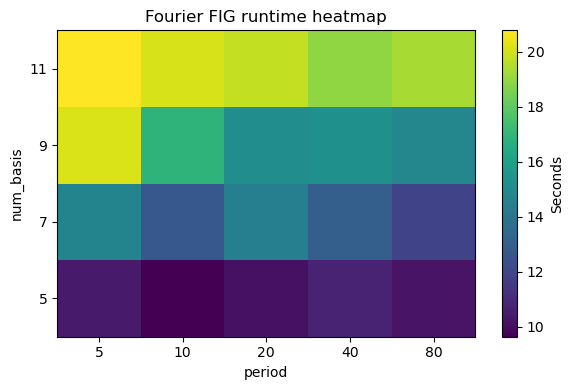

In [7]:
fourier = np.load(f"{time_dir}/fourier_times.npy")
fourier_meta = np.load(f"{time_dir}/fourier_grid_meta.npy", allow_pickle=True).item()

plt.figure(figsize=(6, 4))
plt.imshow(fourier, aspect="auto", origin="lower")

plt.colorbar(label="Seconds")
plt.xticks(range(len(fourier_meta["period"])), fourier_meta["period"])
plt.yticks(range(len(fourier_meta["num_basis"])), fourier_meta["num_basis"])

plt.xlabel("period")
plt.ylabel("num_basis")
plt.title("Fourier FIG runtime heatmap")
plt.tight_layout()
plt.show()


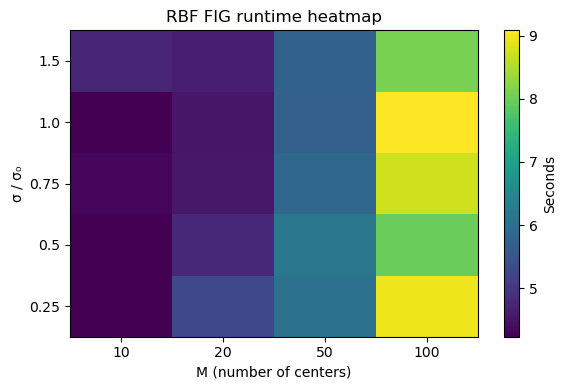

In [5]:
rbf = np.load(f"{time_dir}/rbf_times.npy")
rbf_meta = np.load(f"{time_dir}/rbf_grid_meta.npy", allow_pickle=True).item()

plt.figure(figsize=(6, 4))
plt.imshow(rbf, aspect="auto", origin="lower")

plt.colorbar(label="Seconds")
plt.xticks(range(len(rbf_meta["Ms"])), rbf_meta["Ms"])
plt.yticks(range(len(rbf_meta["sigma_scales"])), rbf_meta["sigma_scales"])

plt.xlabel("M (number of centers)")
plt.ylabel("σ / σ₀")
plt.title("RBF FIG runtime heatmap")
plt.tight_layout()
plt.show()
